## EE 372 Assignment 1

#### Name:  Vivek Kumar Bagaria
#### Date: 

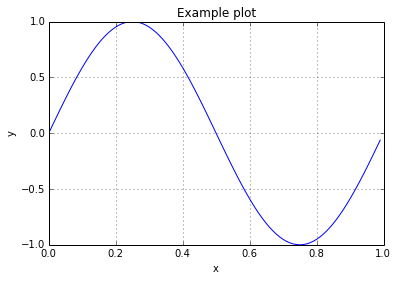

In [159]:
%matplotlib inline

# The only libraries you should need for this assignment. 
# Execute this cell first. (You should get a sine wave.)
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special
import pylab

x = np.arange(0,1.0, 0.01)
y = np.sin(2*np.pi*x)
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example plot')

### Question II: Base calling for Illumina sequencing

2.

Simulate and plot $y(1),\dots,y(L)$ according to the probability model (for $s(t)$ being i.i.d. equally probable to be 0 or 1). Do this for various values of $p=0,0.01,0.05,0.1,0.2 $ and for $\sigma^2 = 0.1$

The yellow shade denotes that the nucleotide at that position was 'A'


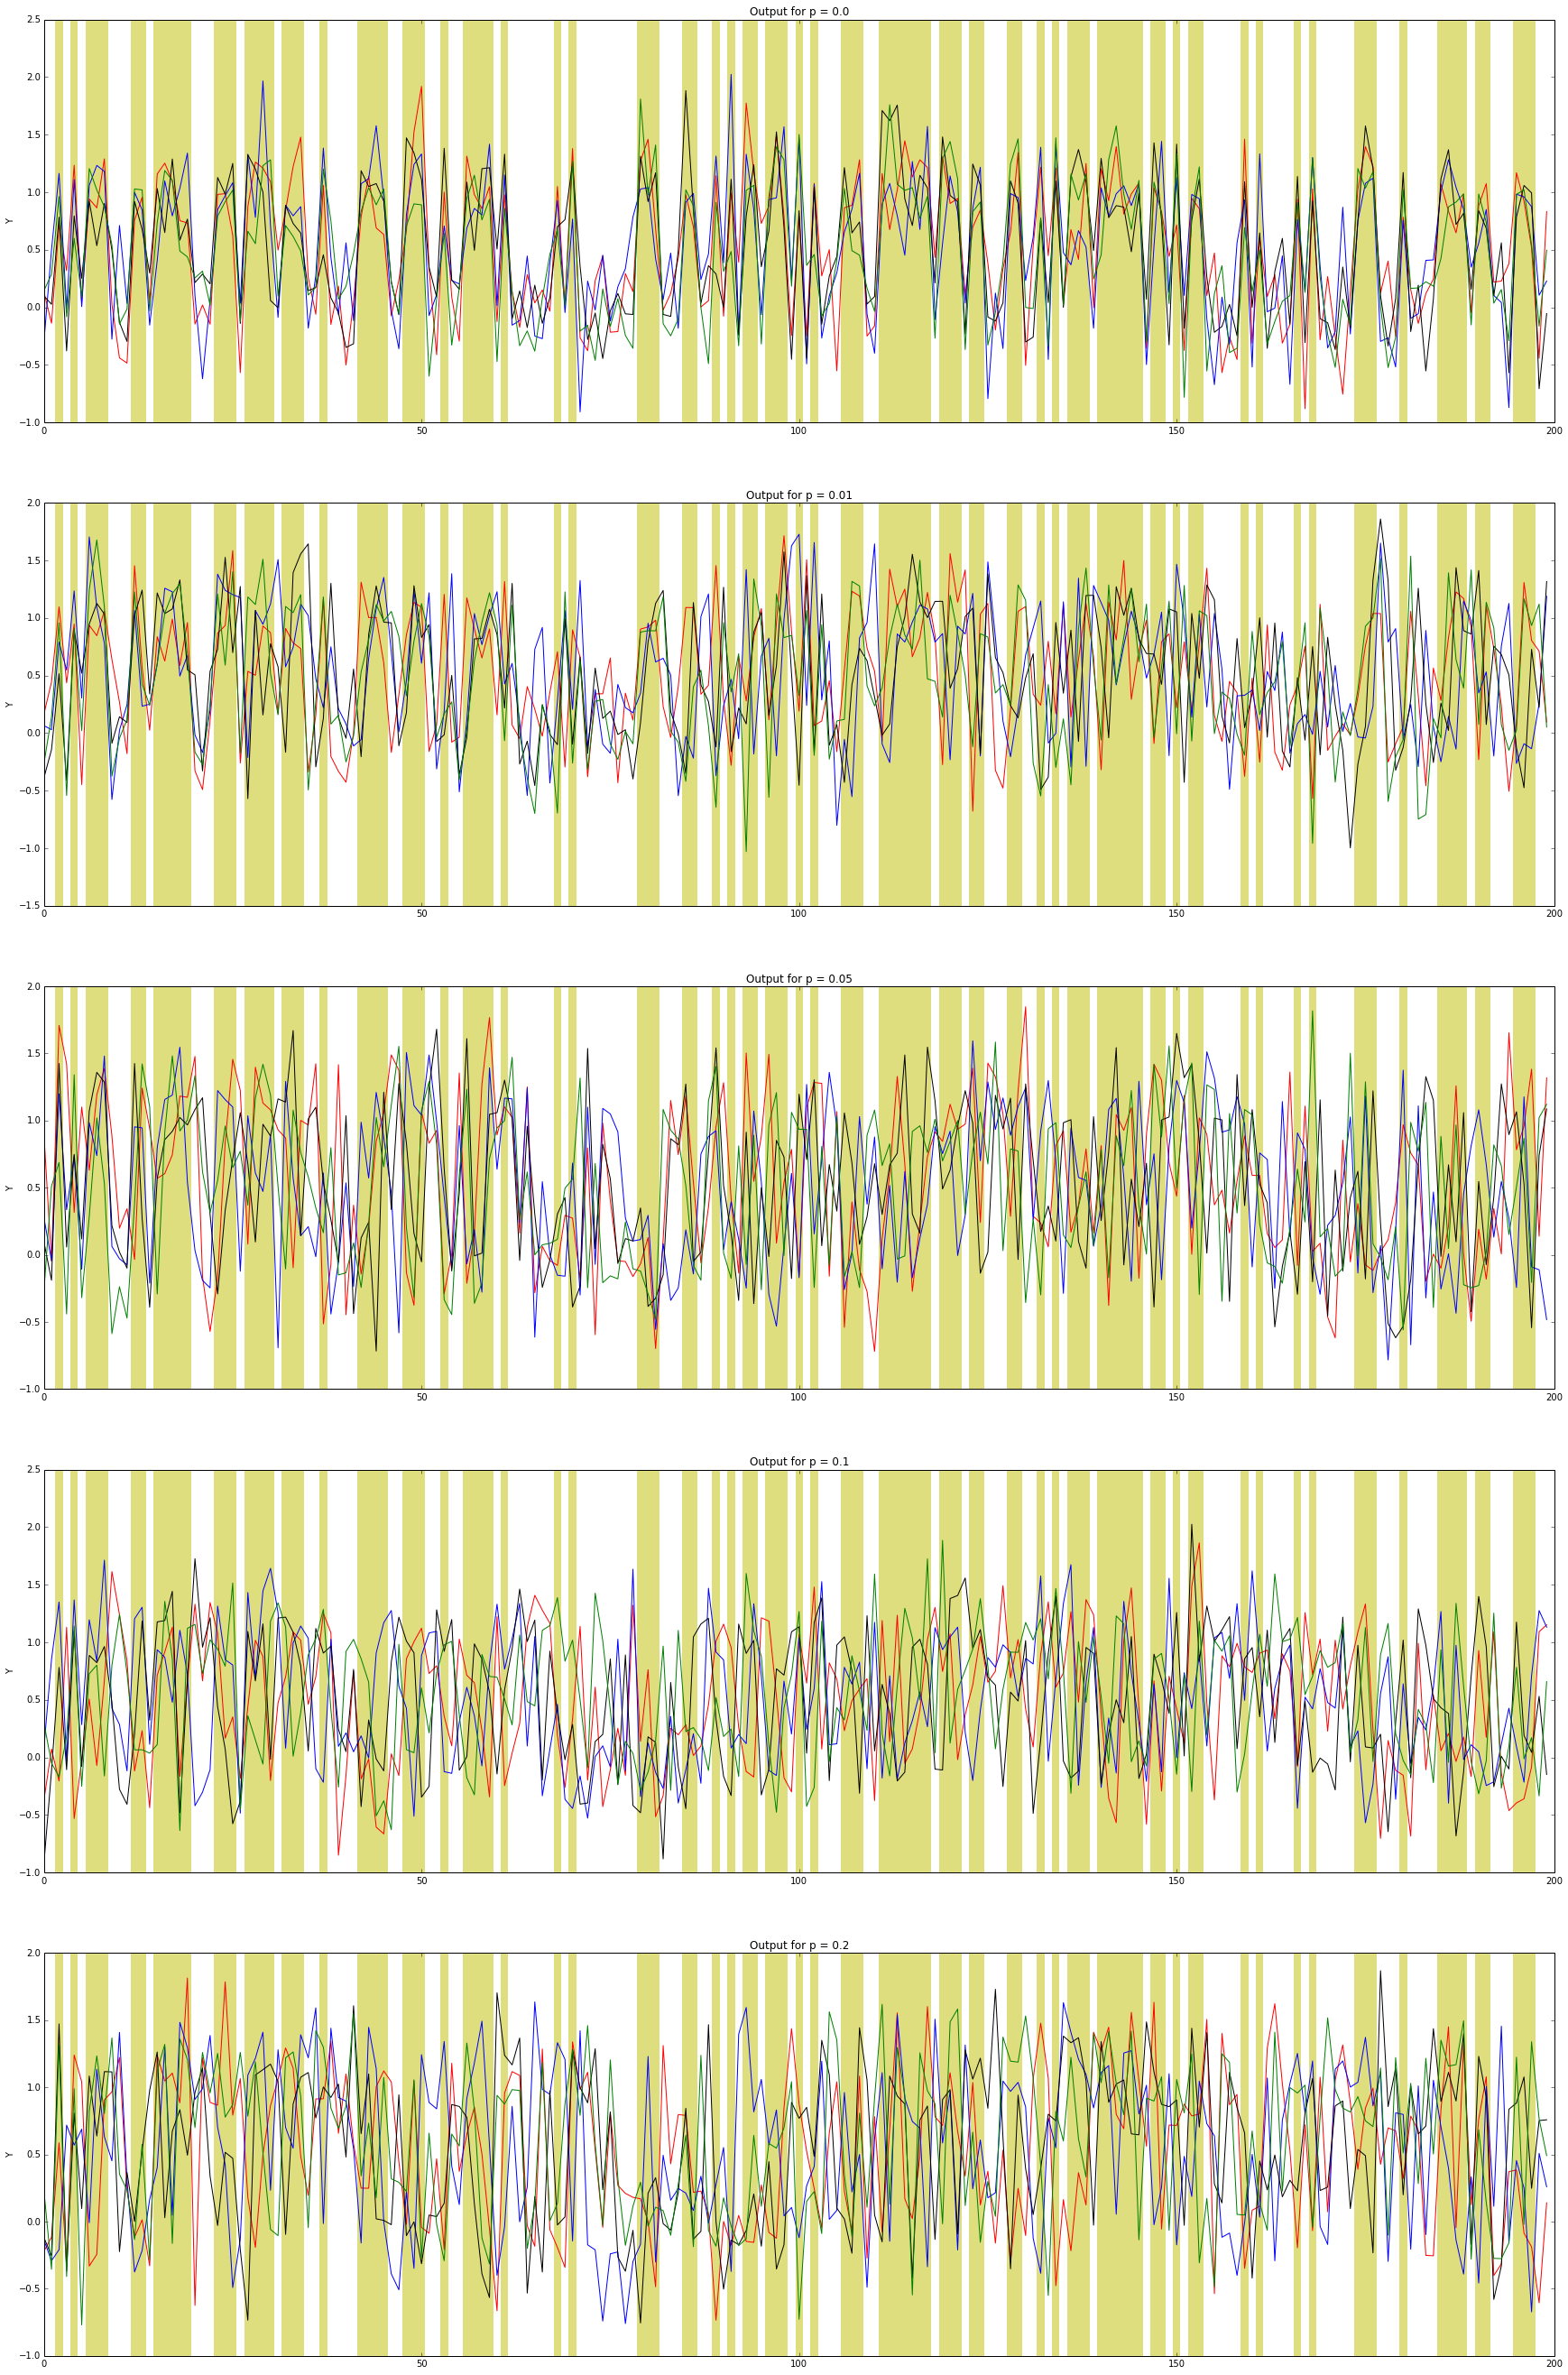

In [117]:
L = 200 #Read Length
repeat = 4
colors = ['red','blue', 'black','green', 'yellow']
a = [0,0.01,0.05,0.1,0.2]*repeat
a.sort()
p_array = np.array(a)
S = np.random.binomial(1, 0.5, L) # The nucleotide
s1 = np.where(S==1)[0] - 0.5
s2 = np.where(S==1)[0] + 0.5
if s1[0] == -.5:
    s1[0] = 0
plot_pos = 0
plt.figure(figsize=(30,200))
print("The yellow shade denotes that the nucleotide at that position was 'A'")
for j, p in enumerate(p_array):
    Y = np.zeros(L) #Output
    Pos = 0 #Number of synthesized nucleotides    
    for i in range(L):
        noise = np.random.normal(scale = math.sqrt(.1))
        Y[i]  = float(S[Pos] + noise)
        Pos += 1 - np.random.binomial(1, p, 1)[0]
    if j%repeat ==0:
        plot_pos +=1
        plt.subplot( p_array.shape[0]+1, 1,plot_pos)
        for col in range(s1.shape[0]):
            plt.axvspan(s1[col], s2[col], color='y', alpha=0.5, lw=0)
    plt.title('Output for p = '+str(p))
    plt.ylabel('Y')
    plt.plot(Y, color = colors[j%repeat])



3.

After writing down your zero-forcing equalizer and the decoding rule, simulate this rule and for different values of $p$ plot its quality score $Q$ as a function of position along the DNA sequence. 

/Library/Python/2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10


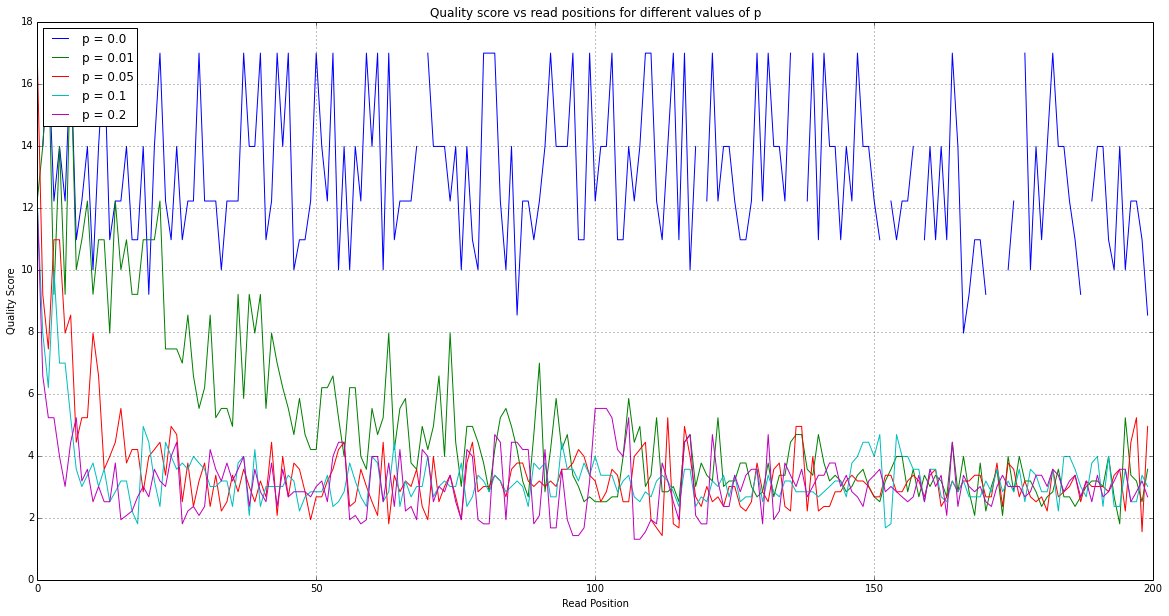

In [178]:


L = 200 #Read Length
p_array = np.array([0,0.01,0.05,0.1,0.2])
S = np.random.binomial(1, 0.5, L)*0.5 # The nucleotide
S[np.where(S==0)] = -0.5
pylab.figure(figsize=(20,10))

for j, p in enumerate(p_array):
    
    #Calculation Q (for a given p) amd its inverse
    Q = np.zeros([L,L])
    for t in range(L):
        for j in range(t+1):
            Q[t][j] = scipy.special.binom(t+1,j+1)*math.pow(1-p,j+1)*math.pow(p,t-j)
    Q_inv = np.linalg.inv(Q)
    experiments = 50
    X_hat_hat = np.ones([experiments,L])*0.5
#     print("\n\n")
#     print(S)
    for exp in range(experiments):
        Y = np.zeros(L) #Output
        Pos = 0 #Number of synthesized nucleotides    
        for i in range(L):
            noise = np.random.normal(scale = math.sqrt(sigma))
            Y[i]  = float(S[Pos] + noise)
            Pos += 1 - np.random.binomial(1, p, 1)[0]
        X_hat = Q_inv.dot(Y)
        threshold = np.where(X_hat < 0)
        X_hat_hat[exp][threshold] = -0.5
    P_e = np.absolute( np.average(X_hat_hat,axis = 0).astype('float') - S)
    Quality = -10*np.log10(P_e)
    pylab.plot(Quality,label='p = '+str(p))
    pylab.grid()
    pylab.legend(loc='upper left')
    pylab.xlabel('Read Position')
    pylab.ylabel('Quality Score')
    pylab.title('Quality score vs read positions for different values of p')



4.

After writing down the formula for the MMSE equalizer
and the corresponding decoding rule, simulate this rule and for different values of $p$ plot the resulting quality score as a function of position along the DNA sequence.

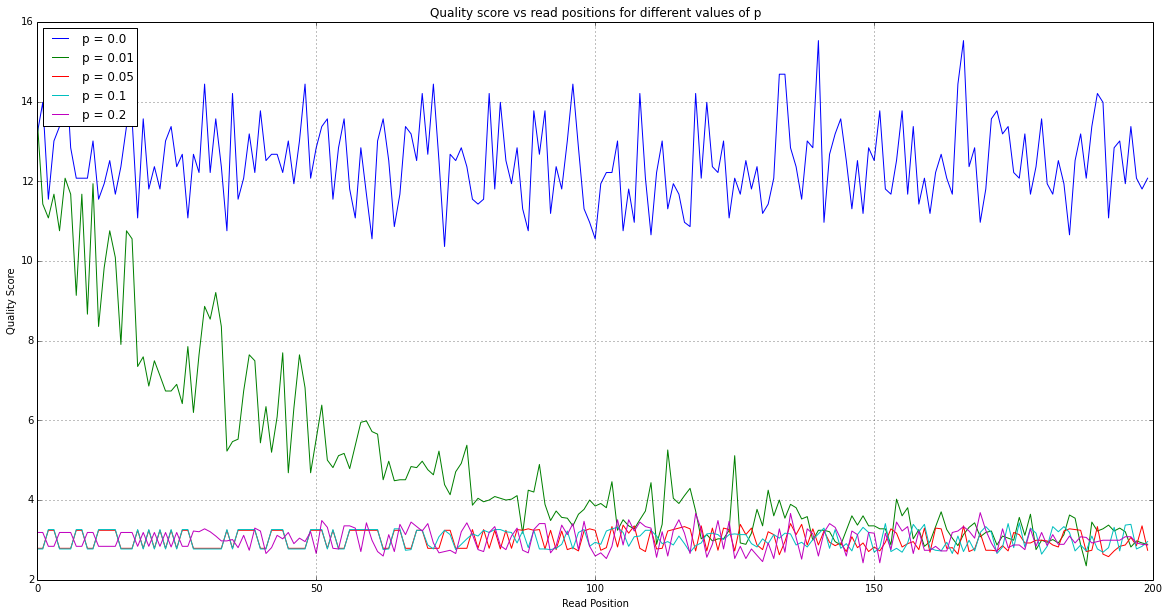

In [180]:


L = 200 #Read Length

p_array = np.array([0,0.01,0.05,0.1,0.2])
S = np.random.binomial(1, 0.5, L)*0.5 # The nucleotide
S[np.where(S==0)] = -0.5
pylab.figure(figsize=(20,10))

for j, p in enumerate(p_array):
    
    #Calculation Q (for a given p) amd its inverse
    Q = np.zeros([L,L])
    for t in range(L):
        for j in range(t+1):
            Q[t][j] = scipy.special.binom(t+1,j+1)*math.pow(1-p,j+1)*math.pow(p,t-j)
    Q_inv = Q.T.dot(np.linalg.inv(Q.dot(Q.T)+sigma))
    experiments = 5000
    X_hat_hat = np.ones([experiments,L])*0.5
#     print("\n\n")
#     print(S)
    for exp in range(experiments):
        Y = np.zeros(L) #Output
        Pos = 0 #Number of synthesized nucleotides    
        for i in range(L):
            noise = np.random.normal(scale = math.sqrt(sigma))
            Y[i]  = float(S[Pos] + noise)
            Pos += 1 - np.random.binomial(1, p, 1)[0]
        X_hat = Q_inv.dot(Y)
        threshold = np.where(X_hat < 0)
        X_hat_hat[exp][threshold] = -0.5
    P_e = np.absolute( np.average(X_hat_hat,axis = 0).astype('float') - S)
    Quality = -10*np.log10(P_e)
    pylab.plot(Quality,label='p = '+str(p))
    pylab.grid()
    pylab.legend(loc='upper left')
    pylab.xlabel('Read Position')
    pylab.ylabel('Quality Score')
    pylab.title('Quality score vs read positions for different values of p')



5.i.

After finding the appropriate detection rule, plot the quality score for a fixed $p=0.05$ as a function of the position $m$. Compare this to the performance of the base calling rules in parts 3. and 4.

### Question III: Read alignment with Bowtie

3.

How many distinct 20-length substrings do you see across all reads? These substrings are commonly referred to as $k$-mers where $k$ = 20. Count how often each distinct 20-mer appears and generate a histogram of the counts. _Hint_: Note that initializing a length-$4^{20}$ array may not be a viable approach. Consider using dictionaries!